## The Hello World of machine learning

**Problem Statment:** Predict the class of each flower.

### Table of Contents

1. [Loading the dataset](#Load-The-Data)
2. [Summarizing the dataset](#Summarize-the-Dataset)
3. [Visualizing the dataset](#Data-Visualization)
4. [Evaluating some algorithms](#Evaluate-Some-Algorithms)
5. [Making Some Predictions](#Make-Predictions)

## 1. Load The Data

In this step we are going to load the libraries and load iris data from the scikit-learn library.

In [10]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Load dataset

In [11]:
# load the data
iris = load_iris()
X = iris.data
y = iris.target

# get feature names
feature_names = iris.feature_names
# get target classes
target_names = iris.target_names


# print feature_names and target_names
print("Feature names: ",feature_names)
print("Target names: ",target_names)
print(iris.DESCR)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9

In [3]:
# create a dataframe from the above data
data = pd.DataFrame(X, columns=feature_names)

# let's also merge the target variable into the dataframe
target_df = pd.DataFrame(y, columns=["class"])
data = pd.concat([data,target_df], axis=1)

## 2. Summarize the Dataset

Now its time to take a look at the data. In this step we are going take a look at the data a few different ways:

- Dimensions of the dataset
- Peek at the data itself
- Statistical summary of all attributes
- Breakdown of the data by the class variable

**Dimensions of Dataset** 

In [4]:
print("There arer {} rows and {} columns in the dataset.".format(data.shape[0], data.shape[1]))

There arer 150 rows and 5 columns in the dataset.


**Peek at the Data**

In [5]:
# view first 5 rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Statistical Summary**

Now we can take a look at a summary of each attribute. This includes the count, mean, min and max values as well as some percentiles.

In [6]:
# descriptive summary
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can see that all the numerical values have the same scale (centimeter) and similar ranges between 0 and 8.

**Class Distribution**

let's now take a look at the number of instances that belongs to each class.

In [7]:
# class distribution
print(data.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


- 0 represents setosa class
- 1 represents versicolor class
- 2 represents virginica class

we see that the each class has the same number of instances.

## 3. Data Visualization

We now have the basic idea about the data. we need to extend this with some visualizations. We are going to look at two types of plots:
- Univariate plots to better understand each attribute
- Multivariate plots to better understand the relationships between attributes.

**Univariate plots**

I will start with some univariate plots, that is, plots of each individual variable. Given that the input variable are numeric, we can create box and whisker plots of each.

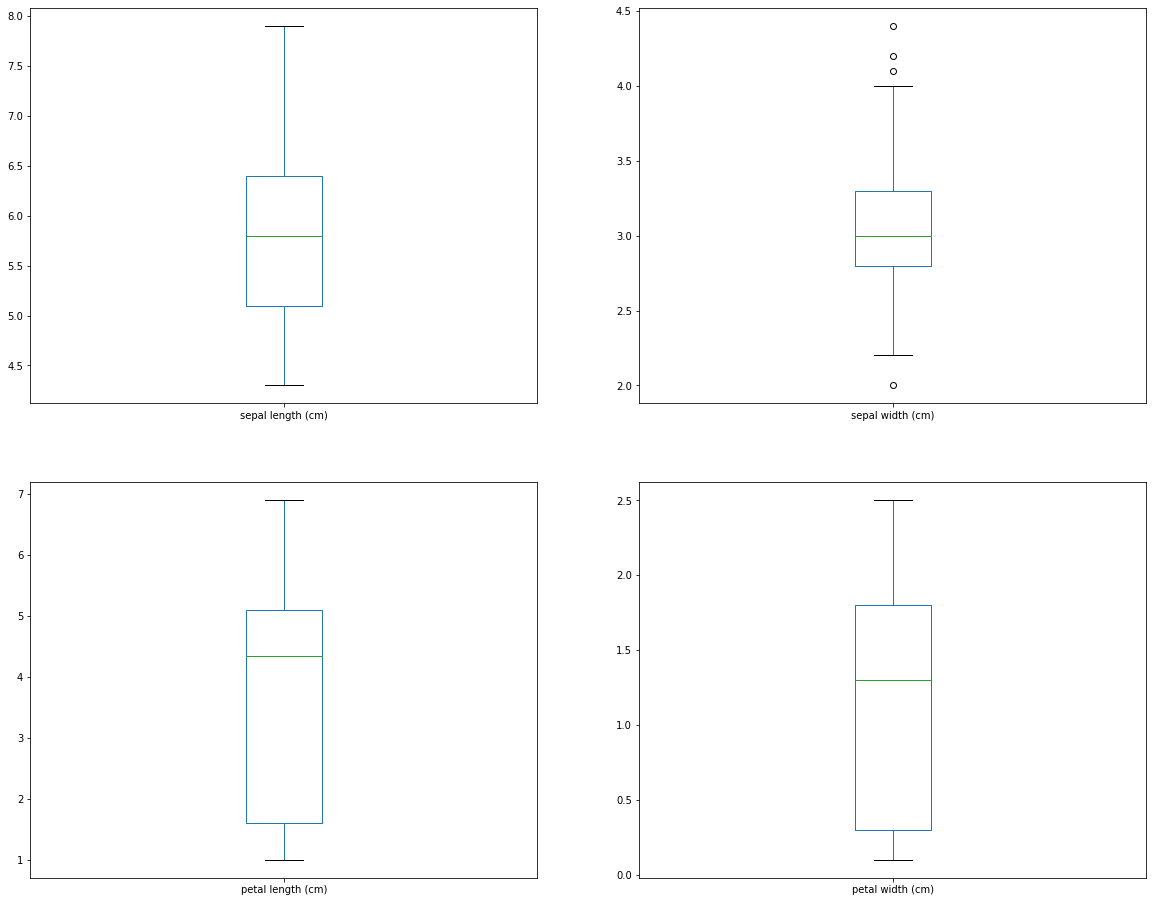

In [8]:
# box and whisker plots
data.iloc[:,0:4].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(20,16))
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

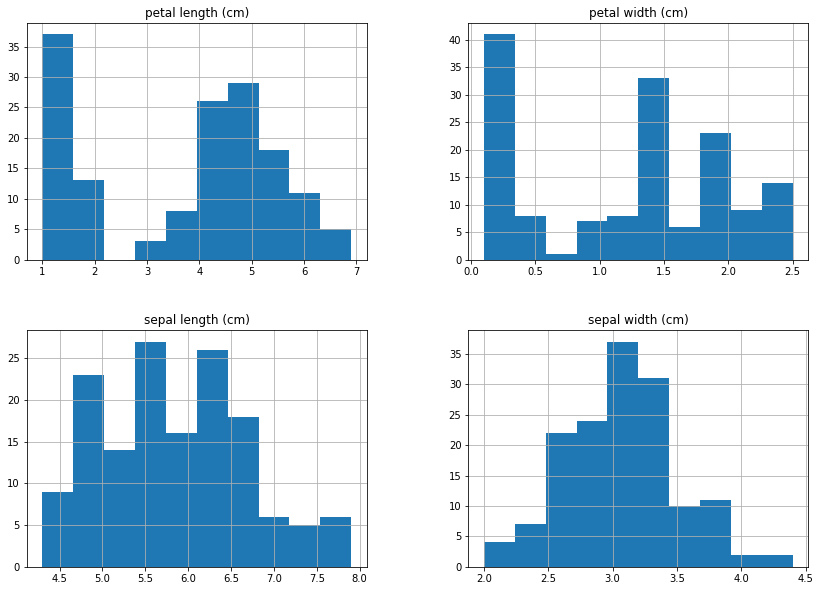

In [9]:
data.iloc[:,0:4].hist(figsize=(14,10))
plt.show()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

**Multivariate Plots**

Now we can look at the interactions between the variables. Let's look at scatter plots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

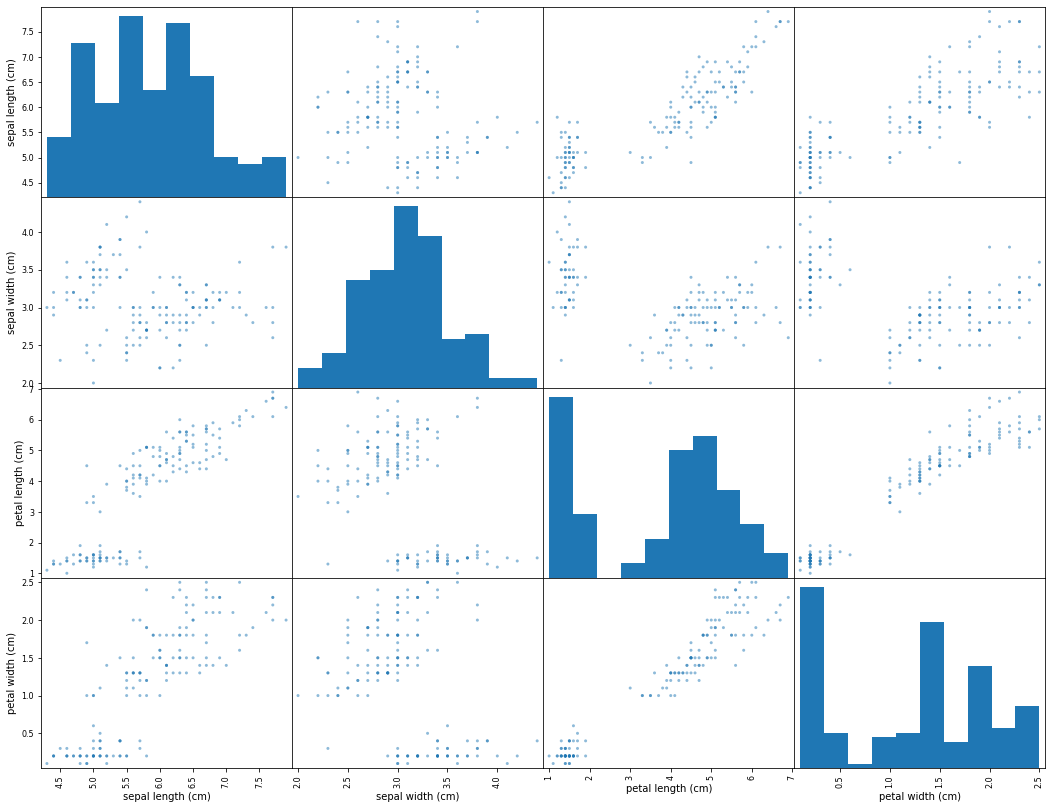

In [10]:
# scatter plot matrix
scatter_matrix(data.iloc[:,0:4], figsize=(18,14))
plt.show()

## 4. Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data. 

Here is what I am going to do in this step:
- Split out into train set and test set
- set up the test harness to use 10-Fold cross validation
- Build 5 different models to predict species from flower measurements.
- Select the best model

**Split into train set and test set**

In [11]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

In [12]:
# check shape of training set and test set
print("Train data: ",X_train.shape, y_train.shape)
print("Test data: ",X_test.shape, y_test.shape)

Train data:  (120, 4) (120,)
Test data:  (30, 4) (30,)


**test harness**

I will use 10-Fold cross validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train_test splits. I will be using the metric of accuracy to evaluate models. This a ratio of the correctly classified instances divided by the total number of instances in the dataset. 

**Build Models**

I don't know which algorithm would be good on this problem or what configurations to use. We get an idea from the plots that some the classes are partially linearly seprable in some dimensions, so we are expecting generally good results.

Let's evaluate 5 different algorithms:
- Logistic Regression (LR)
- k-Nearest Neighbors (KNN)
- Decision Tree Classifier (TREE)
- Gaussian Naive Bayes (NB)
- Support Vector Machine (SVM)

In [13]:
# Spot-Check Algorithms

models = []

models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name) 
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.983333 (0.033333)
KNN: 0.983333 (0.033333)
TREE: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


**Select the Best Model**

We can see that it looks like SVM has the largest esimated accuracy score. We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm was evaluated 10 times.

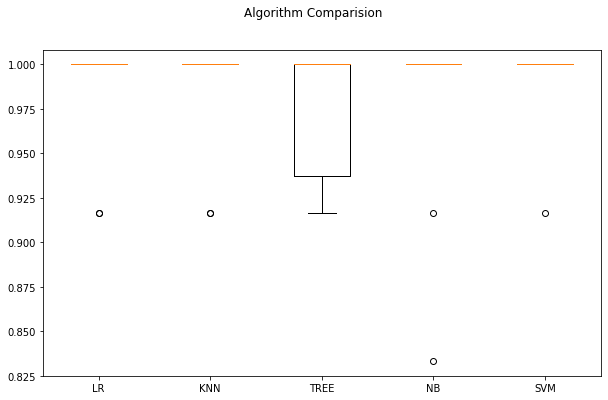

In [15]:
# Compare Algorithms
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 5. Make Predictions

The SVM algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our test set. This will give us independent final check on the accuracy of the best model. 

In [20]:
# Make predictions on the test set
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  0]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      1.00      0.91        10
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30



We can see that the accuracy is .9333 or 93.33%. The confusion matrix provides an indication of the three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.